# Mission Impossible

 __Autor: Diego Diaz Ross__

# 1) Análisis Exploratorio 

__¡Cuando te enteras que parte de la data esta corrompida!__

<img src="data_with_noise.jpg" width="600" height="300">

Vamos a suponer de acuerdo al contexto del problema que en la base de datos enviada por nuestro agente.Las filas se corresponden a los ingredientes de una hamburguesa en particular. Y que las columnas corresponden a la cantidad de un ingrediente determinado  que cada hamburguesa posee. No sabemos las unidades de masa/peso utilizadas. Otra suposición que hacemos es que cada hamburguesa se puede clasificar en un determinado tipo. Lamentablemente nuestro agente no pudo enviarnos las categorías.

A medida que vamos ejecutando el código iremos recogiendo los principales insights que se desprenden 
de los análisis. 

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
#cambiamos el directorio
os.chdir("C:/Users/PC/walmart challenge")
#configuramos opciones de visualización de la base.
pd.set_option("display.max_rows", 30)
pd.set_option("display.min_rows", 30)

In [3]:
#leemos los datos
data=pd.read_csv("dataset.csv",sep=";",header=0)

In [4]:
data.shape

(54966, 810)

Tenemos que la información enviada por nuestro agente consiste en una base de datos
de 54.966 hamburguesas y posibles 810 ingredientes.


In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,800,801,802,803,804,805,806,807,808,809
0,0,0,0,0,0,0,0,0,0,0,...,47,41,54,50,50,47,55,40,47,43
1,0,0,0,0,0,0,0,0,0,0,...,30,47,47,41,44,46,51,43,54,34
2,0,0,0,0,0,0,0,0,0,0,...,41,53,56,39,52,53,54,33,52,27
3,0,0,0,0,0,0,0,0,0,0,...,32,26,28,26,29,26,27,19,25,34
4,0,0,0,0,0,0,0,0,0,0,...,30,19,20,27,33,32,25,16,22,28


Una forma natural de caracterizar las hamburguesas puede ser por su número de ingredientes distintos. Al igual que por su tamaño.  Para registrar lo anterior agregaremos a la base estas 2 variables.

In [6]:
#funcion auxiliar,retorna el numero de ingredientes (distintos) utilizados para una hamburguesa
def n_ingredients(x):
    r=0
    for ingredient in x:
        if ingredient>0:
            r+=1
    return r        


In [7]:
#funcion auxiliar,creamos la variable que registra la cantidad de ingredientes distintos por hamburguesa
data["c_ingredientes"]=data.apply(n_ingredients,axis=1)

#creamos la variable que nos indica el peso total de la suma de ingredientes de cada hamburguesa
data["peso"]=data.apply(sum,axis=1)

A continuación graficamos la distribución del numero de ingredientes por hamburguesa.

Text(-0.16499999999999915, 0.5, 'Conteo')

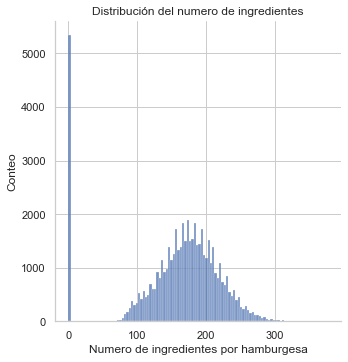

In [8]:
sns.set_theme(style="whitegrid")
g=sns.displot(data["c_ingredientes"],kind="hist")
plt.title("Distribución del numero de ingredientes")
plt.xlabel("Numero de ingredientes por hamburgesa")
plt.ylabel("Conteo")

No es posible que existan hamburguesas con 0 ingredientes.
Al parecer cuando nuestro agente envió los datos, se corrompió una fracción de estos. Por lo mismo
Vamos a descartar estos registros de la base. Se observa que la hamburguesa promedio posee
alrededor de 200 ingredientes con una desviación estándar de cerca de 40 ingredientes


In [9]:
#borramos las hamburguesas que no tienen ningun ingrediente
index=data[data["c_ingredientes"]==0].index
data.drop(index,axis=0,inplace=True)

Ahora nos fijamos en la proporción de hamburguesas que utilizan 
un determinado ingrediente. Hacemos este cálculo para cada ingrediente. 

In [10]:
#funcion auxiliar que calcula la proporcion de un determinado ingrediente en el total 
# de hamburguesas.
def proportion_ingredients(x):
    
    c=0
    for ingredient in x:
        if ingredient>0:
            c+=1
    return (c/len(x))        


In [11]:
#calculamos las proporciones de cada ingrediente
proportions=data.apply(proportion_ingredients,axis=0)
proportions.drop(["peso","c_ingredientes"],inplace=True)

In [12]:
proportions.value_counts()

0.000000    70
1.000000    19
0.000040    18
0.000020    15
0.000081     7
0.000101     6
0.000060     6
0.000161     5
0.000343     5
0.001290     4
0.000363     4
0.000141     4
0.000121     4
0.000584     4
0.000786     4
            ..
0.017552     1
0.003809     1
0.334193     1
0.035628     1
0.028192     1
0.459959     1
0.355010     1
0.024504     1
0.417318     1
0.313135     1
0.006247     1
0.607569     1
0.496635     1
0.588707     1
0.039699     1
Length: 617, dtype: int64

El output anterior nos señala hay 70 ingredientes que no se utilizaron.

In [13]:
##nos quedamos solo con las proporciones >0
prop=proportions[proportions>0]

A continuación graficamos el número de ingredientes que alcanzan un determinado nivel de utilización. 

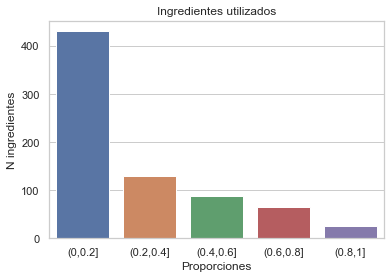

In [14]:
sns.set_theme(style="whitegrid")
x=["(0,0.2]","(0.2,0.4]","(0.4,0.6]","(0.6,0.8]","(0.8,1]"]
g=sns.barplot(x=x,y=prop.value_counts(bins=5))
g.set_title("Ingredientes utilizados")
g.set_xlabel("Proporciones")
g.set_ylabel('N ingredientes')
plt.show()

Del gráfico anterior Se desprende que más de la mitad de los ingredientes (431) 
solo se utilizaron en menos del 20% de las hamburguesas. Y 26 ingredientes están presentes en al menos
el 80% de estas.

Ahora observemos las distribuciones de algunos de los ingredientes más usados.

In [15]:
# top 9 de los ingredientes mas utilizados (1=100%)
prop.nlargest(9)


784    1.0
785    1.0
787    1.0
789    1.0
790    1.0
791    1.0
792    1.0
793    1.0
794    1.0
dtype: float64

<AxesSubplot:xlabel='794', ylabel='Count'>

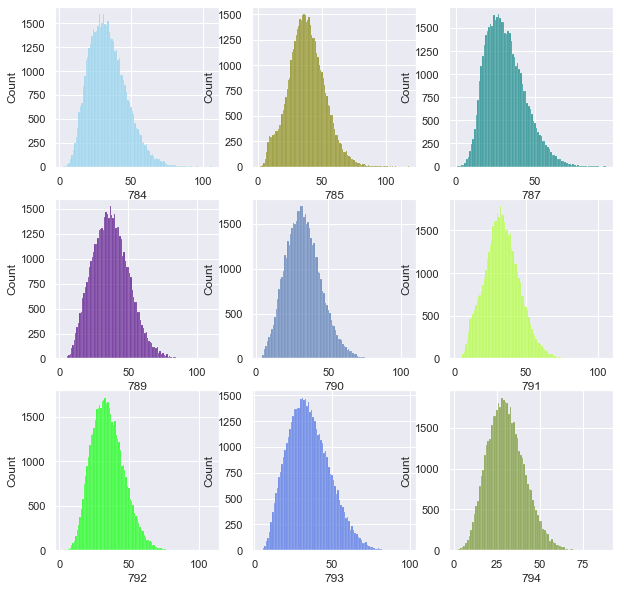

In [16]:
sns.set_theme(style="darkgrid")
f, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.histplot( data["784"],discrete=True , color="skyblue", ax=axes[0, 0])
sns.histplot( data["785"] ,discrete=True, color="olive", ax=axes[0, 1])
sns.histplot( data["787"] ,discrete=True ,color="teal", ax=axes[0, 2])
sns.histplot( data["789"] ,discrete=True ,color="indigo", ax=axes[1, 0])
sns.histplot( data["790"] ,discrete=True ,color="b", ax=axes[1, 1])
sns.histplot( data["791"] ,discrete=True ,color="greenyellow", ax=axes[1, 2])
sns.histplot( data["792"] ,discrete=True ,color="lime", ax=axes[2, 0])
sns.histplot( data["793"] ,discrete=True ,color="royalblue", ax=axes[2, 1])
sns.histplot( data["794"] ,discrete=True ,color="olivedrab", ax=axes[2, 2])


Se observa que las distribuciones son bastante similares. Lo que sugiere 
que estos ingredientes se utilizan en proporciones similares independiente 
del tipo de hamburguesa que se elabore.

A continuación  vamos a estudiar la estructura de correlaciones 

In [17]:
#vamos a remover los ingredientes que no se utilizaron.
ind=proportions[proportions==0].index
data.drop(columns=ind,inplace=True)

In [18]:
data.loc[:,["c_ingredientes","peso"]].corr()

,c_ingredientes,peso
c_ingredientes,1.000000,0.963138
peso,0.963138,1.000000


<AxesSubplot:xlabel='peso', ylabel='c_ingredientes'>

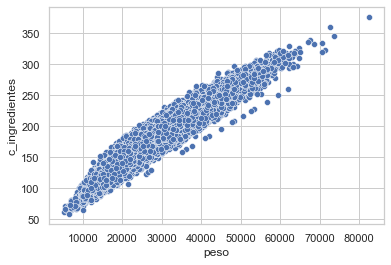

In [19]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x=data["peso"],y=data["c_ingredientes"])

Los outputs anteriores nos enseñan la correlación entre los rasgos que generamos.
Podemos afirmar que las hamburguesas de mayor  tamaño  
Tienden a ser las que más ingredientes poseen.

A continuación generaremos un gráfico de las correlaciones de los ingredientes más utilizados
(al menos  el 50 % de las hamburguesas)

In [20]:
#ingredintes mas utilizados
top_ing_index=prop[prop>=0.5].index
top_ingredient=data.loc[:,top_ing_index]

In [21]:
#matriz de correlaciones
corr=top_ingredient.corr()

<AxesSubplot:>

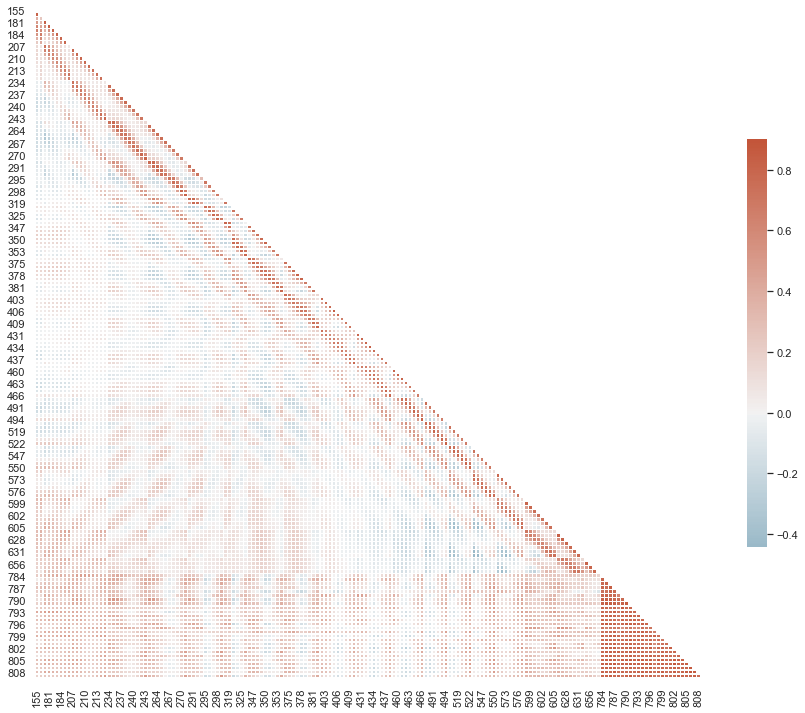

In [22]:
#mapa de calor
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,vmax=0.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Del gráfico anterior (mapa de calor) podemos concluir que hay un subgrupo de ingredientes
que tienden a utilizarse conjuntamente y en proporciones similares.(esquina inferior derecha) 

# 2)  Clasificación de referencia

Ahora nos enfocaremos en la segunda parte del desafío que es generar las etiquetas faltantes, El objetivo 
es poder separar a las hamburguesas en un determinado numero de grupos heterogeneos entre si, pero que  su composición
interna sea homogenenea.

Al tener un número importante de rasgos, sería muy costoso en términos de
computación intentar ejecutar algún algoritmo de aprendizaje no supervisado 
directamente.Lo primero es tratar de reducir la dimensionalidad a través de una técnica
llamada Principal component Analysis (PCA). Con fin de crear una combinación lineal de ingredientes
que sustituyan a los originales. Sin perder mucha información.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
#seleccionamos los rasgos y los estandarizamos
data.reset_index(drop=True,inplace=True)
x=data.loc[:,"12":"809"]
#x=top_ingredient
x=StandardScaler().fit_transform(x)

In [25]:
var_exp=[]
n=50
for i in range(1,n):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    var_exp.append(sum(pca.explained_variance_ratio_))

Text(0.5, 0, 'numero de componentes')

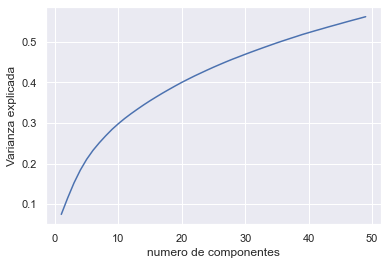

In [26]:
sns.set_theme(style="darkgrid")
g=sns.lineplot(x=range(1,n),y=var_exp)
g.set_ylabel("Varianza explicada")
g.set_xlabel("numero de componentes")

El gráfico anterior nos dice que podemos combinar los 740 rasgos en 40 combinaciones lineales de estos.

In [27]:
pca=PCA(n_components=40)
principal_component=pca.fit_transform(x)


In [28]:
#creamos una base con nuestras 40 componentes principales y la unimos con nuestra base original
columns=["pc_"+str(i) for i in range(1,41)]
pc_data=pd.DataFrame(data=principal_component,columns=columns)
data=data.join(pc_data,how="inner")

A continuación generamos las etiquetas faltantes, utilizando una técnica de modelos no supervisadas 
conocida como Cluster (k-means). El algoritmo busca grupos similares de hamburgesas de acuerdo a estas
40 nuevas combinaciones de ingredientes.

In [29]:
x_ing=data.loc[:,"pc_1":"pc_40"]

In [30]:
from sklearn.cluster import MiniBatchKMeans

A la hora de escoger un criterio para la elección del número de grupos en el que queremos dividir
el total de  hamburguesas. No hay un criterio a priori único. Después de probar distintas
configuraciones decidimos separar en 5 cluster. Debido a que este número nos permite un balanceo entre la 
cantidad de elementos pertenecientes a cada cluster.

In [31]:
k=5
cluster=MiniBatchKMeans(n_clusters=k,init="k-means++", max_iter=500)
cluster.partial_fit(x_ing)
labels=pd.Series(cluster.labels_)

In [32]:
#adjuntamos las etiquetas de los cluster
cluster_label=pd.DataFrame(labels,columns=["cluster"])
data=data.join(cluster_label,how="inner")

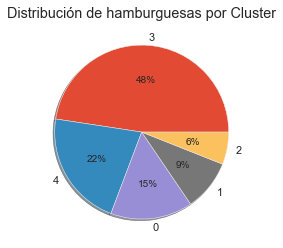

In [43]:
plt.style.use('ggplot')
pct=labels.value_counts()/(data.shape[0])
plt.pie(pct,labels=["3","4","0","1","2"],autopct='%1.f%%',normalize=False,shadow=True)
plt.title("Distribución de hamburguesas por Cluster")
plt.show()


In [34]:
group=data.groupby(by=data["cluster"])

Text(0, 0.5, 'Numero de ingredientes')

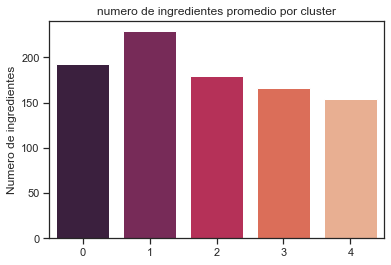

In [35]:
sns.set_theme(style="ticks")
g=sns.barplot(y=group["c_ingredientes"].mean(),palette="rocket",x=list(range(0,5)))
g.set_title("numero de ingredientes promedio por cluster")
g.set_ylabel("Numero de ingredientes")


Text(0.5, 1.0, 'tamaño medio por cluster')

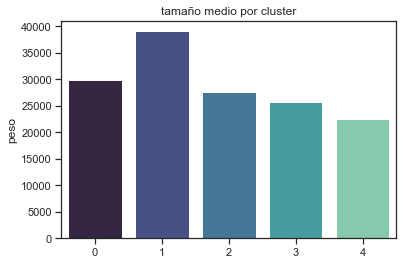

In [36]:
sns.set_theme(style="ticks")
g=sns.barplot(y=group["peso"].mean(),palette="mako",x=list(range(0,5)))
g.set_title("tamaño medio por cluster")

Se aprecia de los de gráficos anteriores que hay 2 cluster bastante diferenciados. Uno de ellos contiene  
las hamburguesas mas basicas y más pequeñas y también menos numerosas y otro que esta formada por las hamburguesas grandes
de mayor tamaño y con mas ingredientes. El resto representa situaciones intermedias entre estos 2 extremos.

# 3) Recomendaciones
Una vez que nuestro agente encubierto nos mande las etiquetas faltantes
(el tipo de hamburguesa asociada con cada registro de la base) podemos construir un clasificador de la 
siguiente forma:

1) Separar la base en 2 muestras aleatorias. 70% de los registros se utilizarán  
   para entrenar nuestro modelo.Y el 30% restante se deja para el testeo de este.

2) Elegir un modelo para la tarea de clasificación, este puede ser una red neuronal,
   regresión logística, SVM, árbol de clasificación,etc. También se puede entrenar mas de un algoritmo y ver cual tiene el
   mejor desempeño.

3) Una vez que tenemos nuestro clasificador debemos probar su desempeño en la muestra dejada aparte (30%).
   Si tiene un desempeño similar que con los datos de entrenamiento hemos terminado. Si por el contrario el desempeño
   de nuestro clasificador cae bruscamente podríamos enfrentarnos a un problema de sobreajuste (overfitting). Deberíamos 
   aplicar alguna técnica de regularización en la etapa de construcción. Y testear nuevamente


In [37]:
#para esribir toda la base (incluido los cluster) a un archivo csv
#data.to_csv("cluster")

Este jupyter notebook se autodestruira en 3 segundos...

<img src="explode.png" width="800" height="400">